# Unit 5 - Financial Planning


In [17]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [6]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [7]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [13]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [36]:
# Fetch current BTC price
BTC_data = requests.get(btc_url).json()
BTC_price = BTC_data["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
ETH_data = requests.get(eth_url).json()
ETH_price = ETH_data["data"]["1027"]["quotes"]["USD"]["price"]
# Compute current value of my crpto
my_btc_value = my_btc * BTC_price
my_eth_value = my_eth * ETH_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $55964.40
The current value of your 5.3 ETH is $7838.44


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [46]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [37]:
# Set Alpaca API key and secret
api_key = os.getenv("ALPACA_API_KEY")
secret_key = os.getenv("ALPACA_SECRET_KEY")
base_url = "https://paper-api.alpaca.markets"
# Create the Alpaca API object
alpaca = tradeapi.REST(api_key, secret_key, base_url, api_version="v2")

In [68]:
# Format current date as ISO format
today = pd.Timestamp("2020-02-25", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
portfolio_df = alpaca.get_barset(tickers, timeframe, start = today, end = today).df
# Preview DataFrame
portfolio_df.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2020-02-25 00:00:00-05:00  115.28  115.58  115.27  115.47  6935476  323.94   

                                                             
                             high     low  close     volume  
time                                                         
2020-02-25 00:00:00-05:00  324.61  311.69  312.7  180541365

In [48]:
# Pick AGG and SPY close prices
agg_close_price = float(portfolio_df["AGG"]["close"])
spy_close_price = float(portfolio_df["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.47
Current SPY closing price: $312.7


In [49]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $15635.00
The current value of your 200 AGG shares is $23094.00


### Savings Health Analysis

In [55]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value
savings_data = {"amount": [crypto, shares]}
df_savings = pd.DataFrame(savings_data, index = ["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,63802.835
shares,38729.000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

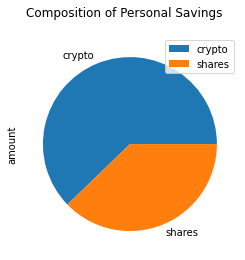

In [59]:
# Plot savings pie chart
df_savings.plot.pie(title = "Composition of Personal Savings", subplots=True)

In [66]:

# Calculate total amount of savings
total_savings = df_savings["amount"].sum()

# Validate saving health
def test_savings(savings, monthly_income):
    emergency_fund = monthly_income * 3
    if savings > emergency_fund:
        print ("Congratulations! Your savings exceed your goals.")
    elif savings == emergency_fund:
        print ("Good Job! You have met your financial goal.")
    else: 
        deficit = emergency_fund - total_savings
        print (f"Your savings are less than the ideal emergency fund. You need to save ${deficit} more.")

test_savings(total_savings, monthly_income)

Your savings are less than the ideal emergency fund. You need to save $34000 more.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [76]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date1 = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date1 = pd.Timestamp('2018-08-06', tz='America/New_York').isoformat()
start_date2 = pd.Timestamp("2018-08-07", tz="America/New_York").isoformat()
end_date2 = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [123]:
# Get 5 years' worth of historical data for SPY and AGG
data_1 = alpaca.get_barset(tickers, timeframe, start = start_date1, end = end_date1, limit = 1000).df
data_2 = alpaca.get_barset(tickers, timeframe, start = start_date2, end = end_date2, limit = 1000).df
df_stock_data = pd.concat([data_1, data_2], axis = 0,)
# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [80]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [81]:
# Printing the simulation input data
MC_30_year.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [83]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001721,0.997228,1.006682,0.999372,1.008179,1.001885,1.002191,0.999762,1.001427,0.994660,...,0.999180,0.995842,0.999158,1.004435,1.001549,1.000111,0.993802,0.988728,0.999931,0.993907
2,1.005097,0.995702,1.007263,0.998300,1.009404,0.992902,0.998179,0.994968,1.004851,0.996906,...,0.993572,0.994199,0.997130,1.000166,1.003527,1.007101,0.987840,0.992677,1.005076,0.992458
3,1.004054,0.993000,1.003439,0.993824,1.019447,0.995839,0.997291,0.990975,1.002597,0.984150,...,0.994172,1.005327,0.996095,0.994802,1.018662,1.002764,0.990964,0.992845,1.012474,0.985640
4,1.008665,0.997321,1.004926,0.986105,1.017267,0.989203,0.992987,0.988804,1.001889,0.976756,...,0.987256,0.996878,0.983845,0.999071,1.019652,1.000092,0.993816,0.994786,1.006313,0.977208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.568341,6.076305,7.168308,4.602105,6.353228,4.014376,5.665288,10.986343,5.402299,4.301992,...,5.085641,5.389339,6.074666,5.339451,5.023313,4.085821,4.534447,4.451324,4.692068,7.532814
7557,2.546540,6.074867,7.156601,4.626925,6.324545,4.049726,5.671378,11.065271,5.452974,4.317315,...,5.100208,5.365439,6.060736,5.330706,5.023038,4.080525,4.536327,4.494060,4.688797,7.545255
7558,2.548046,6.082248,7.139833,4.620957,6.349965,4.031741,5.650430,11.014400,5.487976,4.329836,...,5.085307,5.370971,6.110613,5.356662,5.038873,4.071034,4.572863,4.457655,4.658924,7.533460
7559,2.548838,6.128951,7.052958,4.648245,6.382975,4.066821,5.666210,10.997629,5.519690,4.319809,...,5.082769,5.377823,6.099777,5.307579,5.021214,4.094485,4.598196,4.435678,4.682499,7.480644


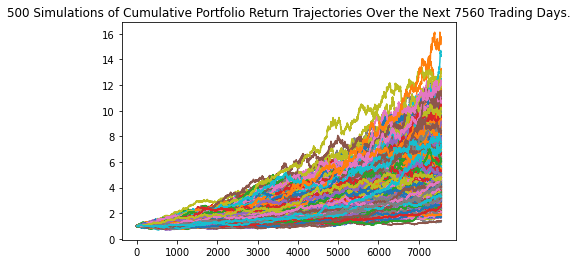

In [84]:
# Plot simulation outcomes
plot_30_year = MC_30_year.plot_simulation()

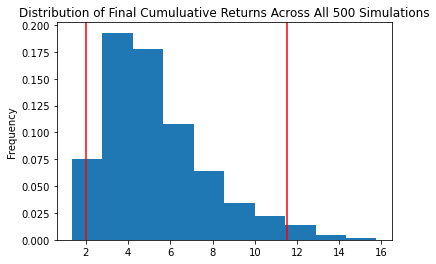

In [86]:
# Plot probability distribution and confidence intervals
bar_30_year = MC_30_year.plot_distribution()

### Retirement Analysis

In [87]:
# Fetch summary statistics from the Monte Carlo simulation results
table_30_year = MC_30_year.summarize_cumulative_return()

# Print summary statistics
print(table_30_year)

count           500.000000
mean              5.343431
std               2.439705
min               1.344556
25%               3.628616
50%               4.842586
75%               6.447375
max              15.759187
95% CI Lower      2.028515
95% CI Upper     11.531933
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [100]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(table_30_year[8]*initial_investment, 2)
ci_upper = round(table_30_year[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $40570.3 and $230638.67


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [112]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year =MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.25, .75],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [113]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007720,0.998499,0.996760,0.998812,0.999823,1.024051,0.996164,1.001616,1.006453,1.011738,...,0.994737,0.993630,0.997360,0.983141,1.013873,0.996166,1.015541,1.001289,0.996552,1.006062
2,1.023029,0.983468,0.999127,1.001942,1.003398,1.012118,0.993707,1.002289,1.019600,1.015434,...,1.000007,0.987592,0.978842,1.000877,1.019474,0.995589,1.028252,1.000547,0.982156,1.012095
3,1.019518,0.993786,0.997316,0.997554,0.999454,1.008742,1.007438,0.985596,1.043640,1.009780,...,1.002105,0.974059,0.968478,0.998962,1.016992,0.991745,1.012145,1.002367,0.978035,1.005162
4,1.025357,1.004625,0.981924,0.989757,0.988488,1.010648,1.015951,0.976274,1.041814,1.025080,...,0.994139,0.974687,0.969835,0.994831,1.017209,0.977922,1.012098,0.988644,0.974843,1.013977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.153648,1.644361,1.142932,1.856622,1.757432,1.686629,2.016574,2.589111,1.817238,1.180596,...,0.992858,1.316539,1.191993,1.145962,1.130223,2.016969,1.432249,1.602589,1.958312,1.500802
1257,2.147292,1.683068,1.148697,1.864126,1.758011,1.687098,2.021069,2.586543,1.820037,1.189612,...,0.995516,1.312721,1.193191,1.127084,1.131999,1.985382,1.428495,1.584231,1.969705,1.512817
1258,2.175807,1.703178,1.146038,1.879098,1.785942,1.667385,2.016060,2.574877,1.824283,1.173282,...,0.991687,1.328860,1.191981,1.112671,1.136186,2.013690,1.426328,1.589749,1.995880,1.507016
1259,2.117727,1.700628,1.137422,1.875325,1.804655,1.681953,2.039139,2.566142,1.842580,1.179498,...,0.992245,1.335428,1.187576,1.128917,1.133154,2.002432,1.433230,1.602623,1.969333,1.517439


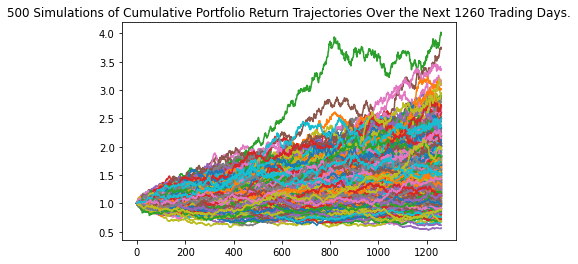

In [114]:
# Plot simulation outcomes
plot_5_year = MC_5_year.plot_simulation()

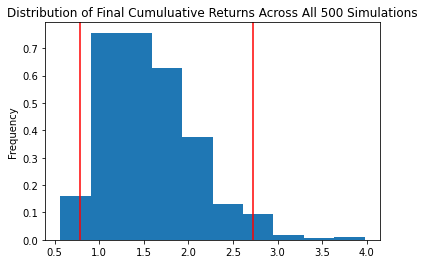

In [115]:
# Plot probability distribution and confidence intervals
bar_5_year = MC_5_year.plot_distribution()

In [116]:
# Fetch summary statistics from the Monte Carlo simulation results
table_5_year = MC_5_year.summarize_cumulative_return()

# Print summary statistics
print(table_5_year)

count           500.000000
mean              1.561313
std               0.513054
min               0.565208
25%               1.184220
50%               1.492262
75%               1.839822
max               3.975481
95% CI Lower      0.784451
95% CI Upper      2.727395
Name: 1260, dtype: float64


In [117]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(table_5_year[8]*initial_investment, 2)
ci_upper_five = round(table_5_year[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $47067.07 and $163643.7


### Ten Years Retirement Option

In [103]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year =MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [104]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006939,0.994098,1.005299,0.998372,0.998467,0.996656,1.010038,0.997857,0.998882,1.004542,...,0.998481,1.006149,1.006800,1.009947,0.994659,0.996141,1.002378,1.006247,0.998018,0.999294
2,1.007948,0.995054,1.005570,0.996328,0.991729,0.990958,1.007209,1.001482,0.996310,1.007645,...,1.001363,1.003617,1.012084,1.001806,0.994419,0.992029,1.000492,0.995410,0.998804,0.997398
3,1.008832,1.000694,1.002572,0.996963,0.987172,0.988229,1.016098,1.006361,0.989413,1.014540,...,0.996813,1.003312,1.019419,0.998857,0.997258,0.977169,1.002410,0.998345,0.999114,0.994176
4,1.013267,1.003589,1.008043,0.997768,0.990065,0.991224,1.014811,1.004793,0.982379,1.017804,...,0.994908,1.007224,1.022665,1.002859,1.000631,0.984413,0.996416,0.990524,0.997930,1.002323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.046342,1.212044,1.759980,2.583625,1.644868,1.329255,1.529705,2.305075,1.824360,1.800876,...,2.134755,1.623116,1.216148,2.292612,2.039151,1.577223,2.229395,1.204619,2.594474,0.795052
2517,3.054183,1.196138,1.774038,2.602073,1.643784,1.334324,1.523805,2.297676,1.822567,1.796006,...,2.110416,1.626743,1.215148,2.279416,2.023484,1.588452,2.225437,1.207854,2.604502,0.793814
2518,3.025386,1.199776,1.777632,2.608878,1.635362,1.331057,1.526624,2.268556,1.815497,1.794509,...,2.102483,1.613504,1.219865,2.284652,2.016474,1.588943,2.227935,1.215055,2.613067,0.792018
2519,3.006461,1.199417,1.789651,2.630938,1.626724,1.331979,1.516920,2.250588,1.811858,1.780422,...,2.109179,1.619887,1.218445,2.275786,2.027618,1.599927,2.244098,1.210162,2.604598,0.794024


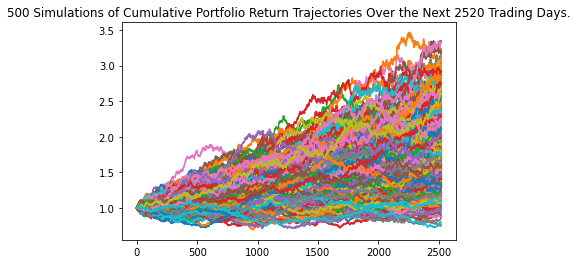

In [105]:
# Plot simulation outcomes
plot_10_year = MC_10_year.plot_simulation()

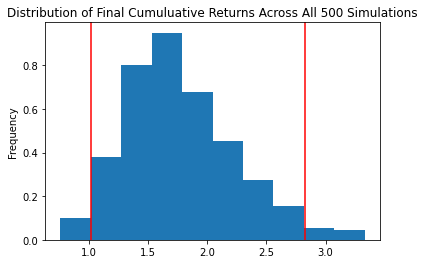

In [106]:
# Plot probability distribution and confidence intervals
bar_10_year = MC_10_year.plot_distribution()

In [107]:
# Fetch summary statistics from the Monte Carlo simulation results
table_10_year = MC_10_year.summarize_cumulative_return()

# Print summary statistics
print(table_10_year)

count           500.000000
mean              1.774249
std               0.469528
min               0.762049
25%               1.442292
50%               1.711048
75%               2.051872
max               3.329660
95% CI Lower      1.017449
95% CI Upper      2.828166
Name: 2520, dtype: float64


In [108]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(table_10_year[8]*initial_investment, 2)
ci_upper_ten = round(table_10_year[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $61046.96 and $169689.95
